# Countries of the World

By Krzysztof Satola from: [github.com/ksatola](https://github.com/ksatola).

Based on CRISP-DM (Cross Industry Process for Data Mining).

## Business Understanding

### Dataset Dictionary

- **country** - country name
- **region** - region name
- **population** - number of people within country
- **area** - area in sq. mi.
- **popdensity** - population density per sq. mi.
- **coast** - coastline (coast/area ratio)
- **netmigr** - net migration. The net migration rate is the difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year. When the number of immigrants is larger than the number of emigrants, a positive net migration rate occurs. A positive net migration rates indicates that there are more people entering than leaving an area. When more emigrate from a country, the result is a negative net migration rate, meaning that more people are leaving than entering the area. When there is an equal number of immigrants and emigrants, the net migration rate is balanced ([source](https://en.wikipedia.org/wiki/Net_migration_rate)).
- **infmortality** - infant mortality (per 1000 births)
- **gdp** - gross domestic product (GDP) in $ per capita. The value of all final goods and services produced within a nation in a given year (2013), converted at market exchange rates to current U.S. dollars, divided by the average population for the same year ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita)).
- **literacy** - literacy level in %
- **phones** - phones per 1000
- **arable** - percent of arable areas
- **crops** - percent of cropland used to grow food
- **other** - other (%) ~????????????????~
- **climate** - climate type
- **birthrate** - the birth rate (technically, births/population rate), the total number of live births per 1,000 in a population in 2013 ([source](https://en.wikipedia.org/wiki/Birth_rate)).
- **deathrate** - number of deaths in units of deaths per 1,000 individuals ([source](https://en.wikipedia.org/wiki/Mortality_rate)).
- **agriculture** - percentage of GDP sector composition ratio for agriculture economy sector ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_sector_composition)). Agriculture % + Industry % + Service = 100% of GDP 
- **industry** - percentage of GDP sector composition ratio for industry economy sector
- **service** - percentage of GDP sector composition ratio for service economy sector

### Objectives

In this project, I explore [Countries of the Worlds Kaggle dataset](https://www.kaggle.com/fernandol/countries-of-the-world) to answer the following questions:

1. How different regions are compared to each other in terms of their area, population, population density and other attributes? What are distinguishing traits of wealthy and poor regions (GDP)?
2. What can we do to limit infant mortality?
3. What are the most significant predictors determining country's GDP per capita, the key indicator of economic development of any country?

Next, I write a post to ??? about my findings.

## Data Understanding

In [112]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Random state
rstate = 123

pd.options.display.float_format = '{:20.2f}'.format

In [11]:
%load_ext version_information

In [14]:
# Document versions of used libraries
%version_information numpy, pandas, matplotlib, seaborn

Software versions
Python 3.7.1 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.2.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.2
pandas 0.23.4
matplotlib 3.0.2
seaborn 0.9.0
Tue Mar 19 22:36:10 2019 CET

In [91]:
# Load data from a CSV file
df = pd.read_csv('./data/countries of the world.csv', decimal=',')

In [92]:
# Initial look into the dataset
df.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
Population,31056997,3581655,32930091,57794,71201
Area (sq. mi.),647500,28748,2381740,199,468
Pop. Density (per sq. mi.),48,124.6,13.8,290.4,152.1
Coastline (coast/area ratio),0,1.26,0.04,58.29,0
Net migration,23.06,-4.93,-0.39,-20.71,6.6
Infant mortality (per 1000 births),163.07,21.52,31,9.27,4.05
GDP ($ per capita),700,4500,6000,8000,19000
Literacy (%),36,86.5,70,97,100


In [93]:
df.tail().T

,222,223,224,225,226
Country,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
Region,NEAR EAST,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA
Population,2460492,273008,21456188,11502010,12236805
Area (sq. mi.),5860,266000,527970,752614,390580
Pop. Density (per sq. mi.),419.9,1,40.6,15.3,31.3
Coastline (coast/area ratio),0,0.42,0.36,0,0
Net migration,2.98,NaN,0,0,0
Infant mortality (per 1000 births),19.62,NaN,61.5,88.29,67.69
GDP ($ per capita),800,NaN,800,800,1900
Literacy (%),NaN,NaN,50.2,80.6,90.7


In [94]:
df.sample(5, random_state=rstate).T

,125,122,156,150,79
Country,Malawi,Macau,Pakistan,Nicaragua,Greece
Region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE
Population,13013926,453125,165803560,5570129,10688058
Area (sq. mi.),118480,28,803940,129494,131940
Pop. Density (per sq. mi.),109.8,16183,206.2,43,81
Coastline (coast/area ratio),0,146.43,0.13,0.7,10.37
Net migration,0,4.86,-2.77,-1.22,2.35
Infant mortality (per 1000 births),103.32,4.39,72.44,29.11,5.53
GDP ($ per capita),600,19400,2100,2300,20000
Literacy (%),62.7,94.5,45.7,67.5,97.5


In [95]:
# Dataset size
df.shape

(227, 20)

## Data Preparation

In [96]:
# Variables
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [97]:
# Naming convention, simplify column names and build a dataset dictionary (see above)
df.rename(columns={"Country":"country", 
                  "Region":"region", 
                  "Population":"population", 
                  "Area (sq. mi.)":"area", 
                  "Pop. Density (per sq. mi.)":"popdensity", 
                  "Coastline (coast/area ratio)":"coast", 
                  "Net migration":"netmigr", 
                  "Infant mortality (per 1000 births)":"infmortality", 
                  "GDP ($ per capita)":"gdp", 
                  "Literacy (%)":"literacy", 
                  "Phones (per 1000)":"phones", 
                  "Arable (%)":"arable", 
                  "Crops (%)":"crops", 
                  "Other (%)":"other", 
                  "Climate":"climate", 
                  "Birthrate":"birthrate", 
                  "Deathrate":"deathrate", 
                  "Agriculture":"agriculture", 
                  "Industry":"industry", 
                  "Service":"service"}, inplace=True)

In [98]:
df.columns

Index(['country', 'region', 'population', 'area', 'popdensity', 'coast',
       'netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [99]:
# Examplary country data
df.iloc[163]

country                                     Poland 
region          EASTERN EUROPE                     
population                                 38536869
area                                         312685
popdensity                                    123.3
coast                                          0.16
netmigr                                       -0.49
infmortality                                   8.51
gdp                                           11100
literacy                                       99.8
phones                                        306.3
arable                                        45.91
crops                                          1.12
other                                         52.97
climate                                           3
birthrate                                      9.85
deathrate                                      9.89
agriculture                                    0.05
industry                                      0.311
service     

In [100]:
# Is there duplicated data in the dataset?
df.duplicated().mean()

0.0

In [101]:
# Country name can be treated as an unique identifier (no duplicated rows)
df.country.value_counts().mean()

1.0

In [102]:
# What are the dataset column data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country         227 non-null object
region          227 non-null object
population      227 non-null int64
area            227 non-null int64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
other           225 non-null float64
climate         205 non-null float64
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [203]:
# Make the strings categorical
df.country = df.country.astype('category')
df.region = df.region.astype('category')
df.climate = df.climate.astype('category')

# Remove blank spaces
df.region = df.region.str.strip()

In [204]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country         227 non-null category
region          227 non-null object
population      227 non-null int64
area            227 non-null int64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
other           225 non-null float64
climate         205 non-null category
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: category(2), float64(15), int64(2), object(1)
memory usage: 44.6+ KB


In [209]:
df.climate.value_counts()

2.00    111
3.00     48
1.00     29
1.50      8
4.00      6
2.50      3
Name: climate, dtype: int64

In [205]:
# What regions do we have?
count_countries_per_region = df.region.value_counts()
count_countries_per_region

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
WESTERN EUROPE          28
ASIA (EX. NEAR EAST)    28
OCEANIA                 21
NEAR EAST               16
C.W. OF IND. STATES     12
EASTERN EUROPE          12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: region, dtype: int64

Text(0, 0.5, 'Region')

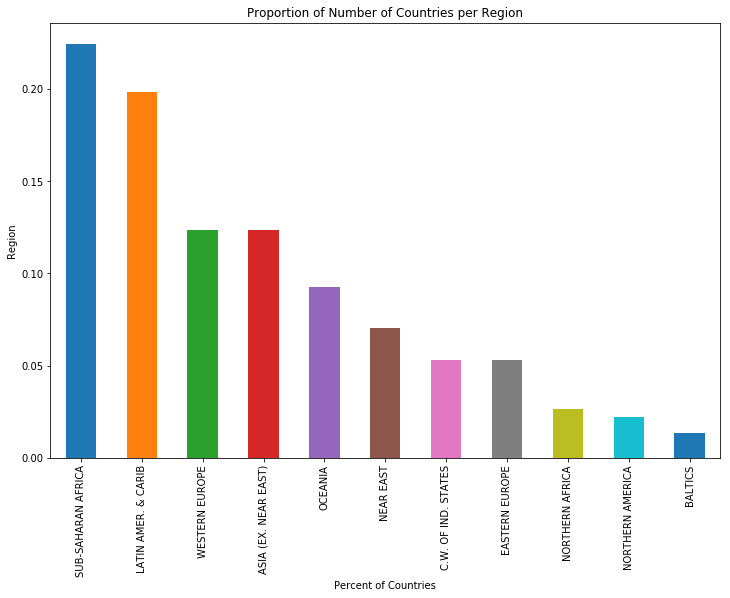

In [241]:
(count_countries_per_region/df.shape[0]).plot(kind="bar", figsize=(12,8));
plt.title('Proportion of Number of Countries per Region')
plt.xlabel('Percent of Countries')
plt.ylabel('Region')

Text(0, 0.5, 'GDP in $ per capita')

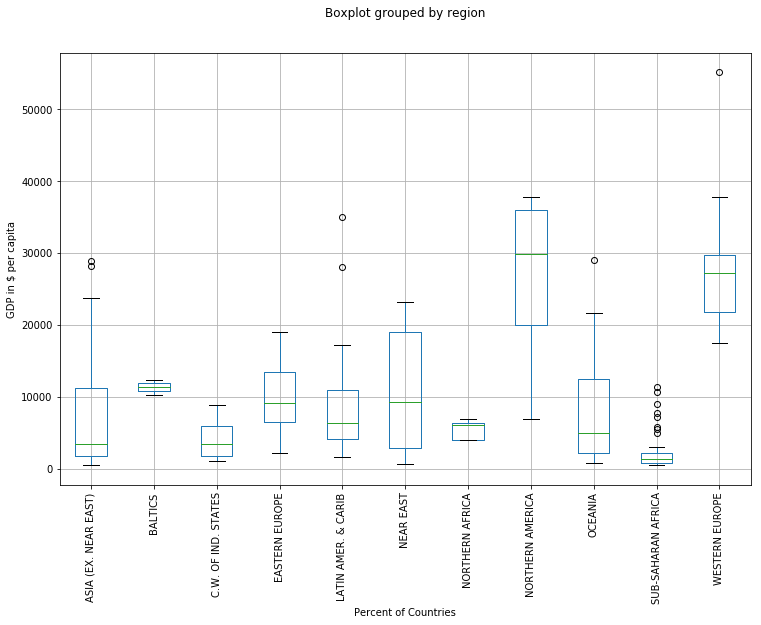

In [240]:
# GDPs per region
df.boxplot(column='gdp', by='region', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Percent of Countries')
plt.ylabel('GDP in $ per capita')

Combine regions close to each other geographically and in terms of their GDP
- Eastern Europe: EASTERN EUROPE + BALTICS
- Western Europe
- Africa: SUB-SAHARAN AFRICA + NORTHERN AFRICA
- Latin America and the Caribbean
- Northern America
- Asia: ASIA (EX. NEAR EAST) + C.W. OF IND. STATES + OCEANIA

In [301]:
# Remap new region definition to a new region2 column
mask = df.region == 'EASTERN EUROPE'
df.loc[mask, 'region2'] = 'Eastern Europe'
mask = df.region == 'BALTICS'
df.loc[mask, 'region2'] = 'Eastern Europe'

mask = df.region == 'WESTERN EUROPE'
df.loc[mask, 'region2'] = 'Western Europe'

mask = df.region == 'SUB-SAHARAN AFRICA'
df.loc[mask, 'region2'] = 'Africa'
mask = df.region == 'NORTHERN AFRICA'
df.loc[mask, 'region2'] = 'Africa'

mask = df.region == 'LATIN AMER. & CARIB'
df.loc[mask, 'region2'] = 'Latin America and the Caribbean'

mask = df.region == 'NORTHERN AMERICA'
df.loc[mask, 'region2'] = 'Northern America'

mask = df.region == 'ASIA (EX. NEAR EAST)'
df.loc[mask, 'region2'] = 'Asia'
mask = df.region == 'C.W. OF IND. STATES'
df.loc[mask, 'region2'] = 'Asia'
mask = df.region == 'OCEANIA'
df.loc[mask, 'region2'] = 'Asia'

In [304]:
df.sample(10, random_state=rstate).T

,125,122,156,150,79,211,184,167,196,20
country,Malawi,Macau,Pakistan,Nicaragua,Greece,Ukraine,Singapore,Reunion,Switzerland,Belize
region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE,C.W. OF IND. STATES,ASIA (EX. NEAR EAST),SUB-SAHARAN AFRICA,WESTERN EUROPE,LATIN AMER. & CARIB
population,13013926,453125,165803560,5570129,10688058,46710816,4492150,787584,7523934,287730
area,118480,28,803940,129494,131940,603700,693,2517,41290,22966
popdensity,109.80,16183.00,206.20,43.00,81.00,77.40,6482.20,312.90,182.20,12.50
coast,0.00,146.43,0.13,0.70,10.37,0.46,27.85,8.22,0.00,1.68
netmigr,0.00,4.86,-2.77,-1.22,2.35,-0.39,11.53,0.00,4.05,0.00
infmortality,103.32,4.39,72.44,29.11,5.53,20.34,2.29,7.78,4.39,25.69
gdp,600.00,19400.00,2100.00,2300.00,20000.00,5400.00,23700.00,5800.00,32700.00,4900.00
literacy,62.70,94.50,45.70,67.50,97.50,99.70,92.50,88.90,99.00,94.10


Text(0, 0.5, 'GDP in $ per capita')

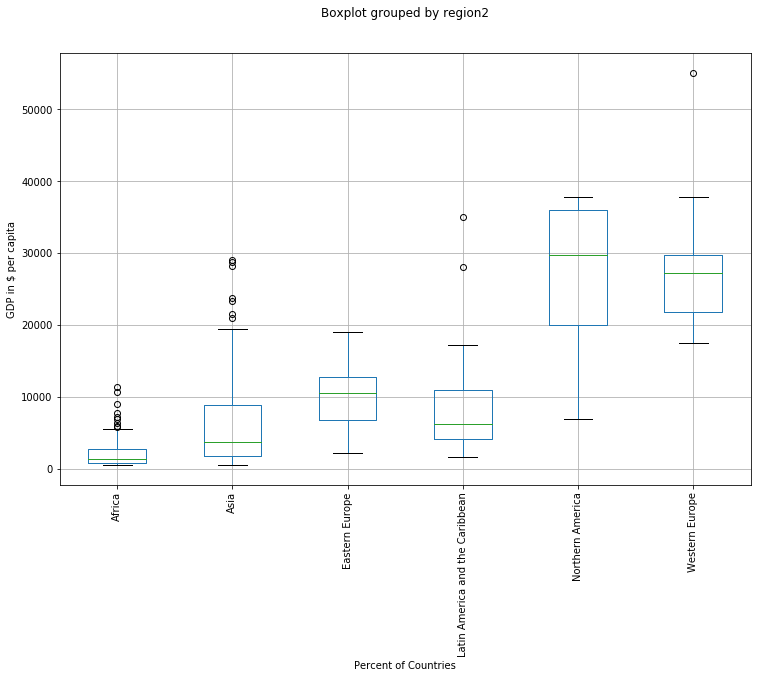

In [305]:
# GDPs per region2
df.boxplot(column='gdp', by='region2', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Percent of Countries')
plt.ylabel('GDP in $ per capita')

In [312]:
df.groupby(['region2']).agg({'country':'count', 'population':'sum', 'area':'sum'})

,country,population,area
region2,,,
Africa,57,910844133,30360296
Asia,61,4001195446,53717367
Eastern Europe,15,127099691,1327237
Latin America and the Caribbean,45,561824599,20544084
Northern America,5,331672307,21782471
Western Europe,28,396339998,3710478


In [310]:
gpd_per_country_weur = df[df.region2 == "Western Europe"]['gdp'].value_counts()
gpd_per_country_weur

22000.00    2
27600.00    2
20000.00    2
32700.00    1
27000.00    1
30000.00    1
31100.00    1
27400.00    1
29600.00    1
21000.00    1
24800.00    1
25000.00    1
28600.00    1
37800.00    1
18000.00    1
34600.00    1
26800.00    1
27700.00    1
29100.00    1
17500.00    1
30900.00    1
26700.00    1
55100.00    1
17700.00    1
19000.00    1
Name: gdp, dtype: int64

Text(0, 0.5, 'Region')

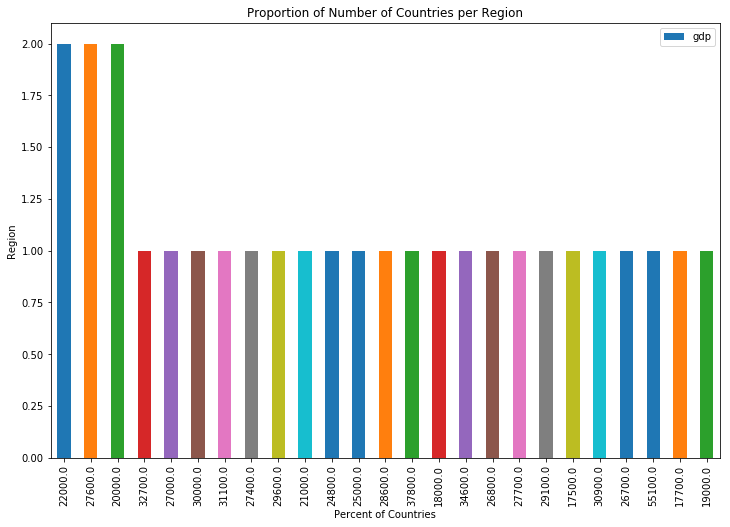

In [309]:
df[df.region2 == "Western Europe"]['gdp'].value_counts().plot(kind="bar", figsize=(12,8), legend=True);
plt.title('Proportion of Number of Countries per Region')
plt.xlabel('Percent of Countries')
plt.ylabel('Region')

In [207]:
# Which regions are there, how many countries that fall into them, 
# what is their population and their total area?
#df.groupby(['region']).mean()[['population', 'area']]
df.groupby(['region']).agg({'country':'count', 'population':'sum', 'area':'sum'})

,country,population,area
region,,,
ASIA (EX. NEAR EAST),28,3687982236,23096712
BALTICS,3,7184974,175015
C.W. OF IND. STATES,12,280081548,22100843
EASTERN EUROPE,12,119914717,1152222
LATIN AMER. & CARIB,45,561824599,20544084
NEAR EAST,16,195068377,4355586
NORTHERN AFRICA,6,161407133,6018890
NORTHERN AMERICA,5,331672307,21782471
OCEANIA,21,33131662,8519812


In [208]:
# Show countries data by region

#df_by_region = df.set_index(['region', 'country']).sort_index()
#df_by_region.xs('ASIA (EX. NEAR EAST)')
#df_by_region.loc['OCEANIA', :] 

#df[df.region == 'ASIA (EX. NEAR EAST)']

df.query("region == 'ASIA (EX. NEAR EAST)' and gdp > 2500")

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
29,Brunei,ASIA (EX. NEAR EAST),379444,5770,65.80,2.79,3.59,12.61,18600.00,93.90,237.20,0.57,0.76,98.67,2.00,18.79,3.45,0.04,0.56,0.40
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.90,0.15,-0.40,24.18,5000.00,90.90,266.70,15.40,1.25,83.35,1.50,13.25,6.97,0.12,0.47,0.40
91,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092,6355.70,67.12,5.24,2.97,28800.00,93.50,546.70,5.05,1.01,93.94,2.00,7.29,6.29,0.00,0.09,0.91
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.20,0.21,-0.07,56.29,2900.00,59.50,45.40,54.40,2.74,42.86,2.50,22.01,8.18,0.19,0.28,0.54
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.90,2.85,0.00,35.60,3200.00,87.90,52.00,11.32,7.23,81.45,2.00,20.34,6.25,0.13,0.46,0.41
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,41.70,0.15,-0.84,41.58,7000.00,79.40,276.40,8.72,1.39,89.89,1.00,17.00,5.55,0.12,0.42,0.46
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.40,7.87,0.00,3.26,28200.00,99.00,461.20,12.19,0.96,86.85,3.00,9.37,9.16,0.02,0.26,0.72
110,"Korea, South",ASIA (EX. NEAR EAST),48846823,98480,496.00,2.45,0.00,7.05,17800.00,97.90,486.10,17.18,1.95,80.87,3.00,10.00,5.85,0.03,0.40,0.56
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.00,146.43,4.86,4.39,19400.00,94.50,384.90,0.00,0.00,100.00,2.00,8.48,4.47,0.00,0.07,0.93
126,Malaysia,ASIA (EX. NEAR EAST),24385858,329750,74.00,1.42,0.00,17.70,9000.00,88.70,179.00,5.48,17.61,76.91,2.00,22.86,5.05,0.08,0.48,0.44


In [106]:
#g = df.groupby("region")
#g.median().T

region,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
population,2.633650e+07,2274735.000,7.641217e+06,6.412408e+06,1065842.000,3488139.500,2.155255e+07,65773.000,114689.0000,8090068.000,4921096.000
area,2.089200e+05,64589.000,2.030500e+05,6.770400e+04,22966.000,51825.000,7.240000e+05,2166086.000,811.0000,245857.000,42310.000
popdensity,1.920000e+02,35.200,5.610000e+01,1.027500e+02,91.400,87.500,3.800000e+01,29.000,60.1000,39.600,167.150
coast,1.235000e+00,0.820,0.000000e+00,6.500000e-02,3.370,1.145,3.250000e-01,2.040,47.0800,0.130,2.000
netmigr,0.000000e+00,-2.230,-2.085000e+00,8.500000e-02,-1.220,0.555,-3.900000e-01,2.490,0.0000,0.000,2.365
infmortality,3.077500e+01,7.870,3.242500e+01,9.330000e+00,18.050,19.060,3.100000e+01,7.540,12.6200,76.830,4.705
gdp,3.450000e+03,11400.000,3.450000e+03,9.100000e+03,6300.000,9250.000,6.000000e+03,29800.000,5000.0000,1300.000,27200.000
literacy,9.060000e+01,99.800,9.905000e+01,9.860000e+01,94.050,83.000,7.000000e+01,97.500,95.0000,62.950,99.000
phones,6.150000e+01,321.400,1.553500e+02,2.960500e+02,222.850,211.000,1.236000e+02,683.200,118.6000,9.700,564.500
arable,1.359500e+01,29.670,1.113500e+01,3.175500e+01,7.600,5.305,3.045000e+00,13.040,5.7100,7.580,16.910


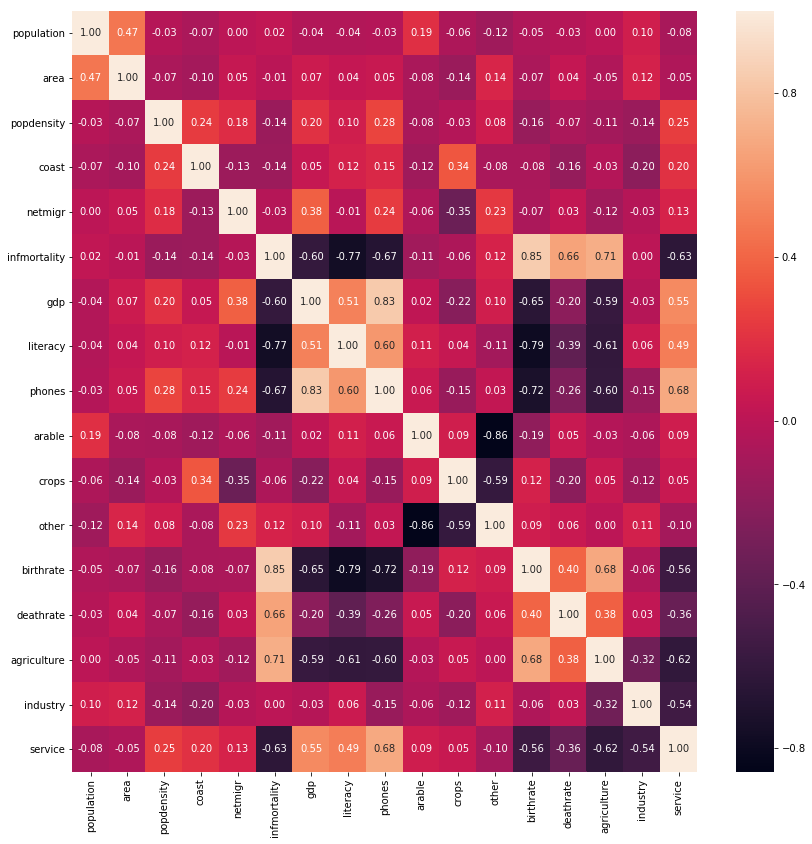

In [246]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show();

In [258]:
df.columns[:]

Index(['country', 'region', 'population', 'area', 'popdensity', 'coast',
       'netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,227.00,28740284.37,117891326.54,7026.00,437624.00,4786994.00,17497772.50,1313973713.00
area,227.00,598226.96,1790282.24,2.00,4647.50,86600.00,441811.00,17075200.00
popdensity,227.00,379.05,1660.19,0.00,29.15,78.80,190.15,16271.50
coast,227.00,21.17,72.29,0.00,0.10,0.73,10.34,870.66
netmigr,224.00,0.04,4.89,-20.99,-0.93,0.00,1.00,23.06
infmortality,224.00,35.51,35.39,2.29,8.15,21.00,55.70,191.19
gdp,226.00,9689.82,10049.14,500.00,1900.00,5550.00,15700.00,55100.00
literacy,209.00,82.84,19.72,17.60,70.60,92.50,98.00,100.00
phones,223.00,236.06,227.99,0.20,37.80,176.20,389.65,1035.60
arable,225.00,13.80,13.04,0.00,3.22,10.42,20.00,62.11


In [79]:
# Missing values
df.isnull().sum()

country          0
region           0
population       0
area             0
popdensity       0
coast            0
netmigr          3
infmortality     3
gdp              1
literacy        18
phones           4
arable           2
crops            2
other            2
climate         22
birthrate        3
deathrate        4
agriculture     15
industry        16
service         15
dtype: int64

In [83]:
# What are the columns with missing values?
df.columns[np.sum(df.isnull()) != 0]

Index(['netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [114]:
df[df.netmigr.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
47,Cook Islands,OCEANIA,21388,240,89.10,50.00,nan,nan,5000.00,95.00,289.90,17.39,13.04,69.57,2.00,21.00,nan,0.15,0.10,0.75
221,Wallis and Futuna,OCEANIA,16025,274,58.50,47.08,nan,nan,3700.00,50.00,118.60,5.00,25.00,70.00,2.00,nan,nan,nan,nan,nan
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.00,0.42,nan,nan,nan,nan,nan,0.02,0.00,99.98,1.00,nan,nan,nan,nan,0.40


### Notes

1. The dataset has 20 variables and 227 observations (one per each country).
2. The dataset column names were standardized and their meaning described in the dataset dictionary.
3. There were no duplicated observations in the dataset.
3. The dataset column types were corrected. The quantitative values used colons insted of periods. This was corrected.
4. The dataset columns with missing values are

## Data Modeling??

## Evaluate the Result

In [ ]:
# answer the questions

### 1. How different regions are compared to each other in terms of their area, population, population density and other attributes? What are distinguishing traits of wealthy and poor regions (GDP)?

It is interesting how different regions on the same continent can be (Europe). The West European countries have generally better indicators than East European countires, which is due to longer period of prosperity, democratic or republic systems and consideration for the law.

### 2. What can we do to limit infant mortality?

In [318]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Population per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df.infmortality,
text = df.country, colorbar = {'title':'Infant Mortality'},
colorscale = 'YlOrRd', reversescale = True)
layout = dict(title='Infant Mortality per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [320]:
#Population per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df.gdp,
text = df.country, colorbar = {'title':'GDP'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [269]:
# How infant mortality is related to other features?
#df[df.columns[:]].corr()['infmortality'][:]
df.corr()['infmortality'].sort_values(ascending=False)

infmortality                   1.00
birthrate                      0.85
agriculture                    0.71
deathrate                      0.66
other                          0.12
population                     0.02
industry                       0.00
area                          -0.01
netmigr                       -0.03
crops                         -0.06
arable                        -0.11
coast                         -0.14
popdensity                    -0.14
gdp                           -0.60
service                       -0.63
phones                        -0.67
literacy                      -0.77
Name: infmortality, dtype: float64

Text(0, 0.5, 'Pearson Correlation')

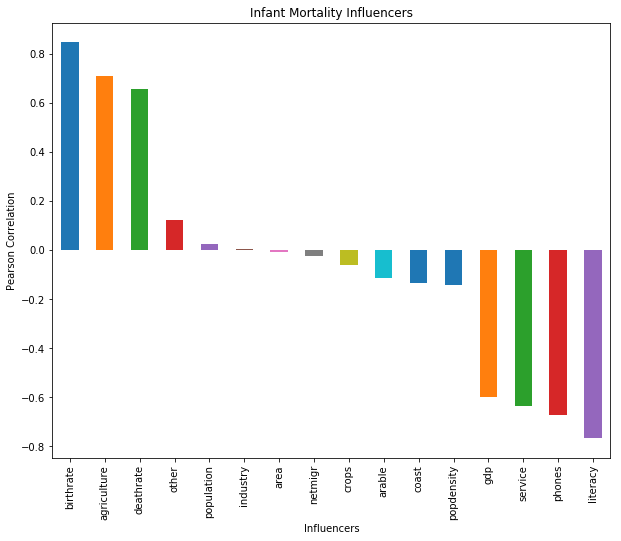

In [282]:
# What influences infant mortality most?
df.corr()['infmortality'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10,8));
plt.title('Infant Mortality Influencers')
plt.xlabel('Influencers')
plt.ylabel('Pearson Correlation')

In [ ]:
# What influences infant mortality most?
df.corr()['infmortality'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10,8));
plt.title('Infant Mortality Influencers')
plt.xlabel('Influencers')
plt.ylabel('Pearson Correlation')

Infant mortality is the death of young children under the age of 1. This death toll is measured by the infant mortality rate (IMR), which is the number of deaths of children under one year of age per 1000 live births. In the 21st century, in the age of robotics, genetics and sophisticated healthcare the mortality rate should be greatly minimized. Yet there are still regions where XXX per 1000 dies during the first year after birth.

Looking at the world maps of mortality and gdp we see they are like inverse of each other. Countries with greater GDP have lower infant mortality and vice versa.

Looking at the world data we can clearly see that the more agricultural the country is, the greater chance of premature mortality exists. The more educated and wealthy the nation is, the more chance infants have to survive. In this context, it is important to that richer and developed countries help the poorer ones both economically and in terms of education. The more aware and enlightened people are, the bigger care they can put into proper health-care infrastructure and treatment (vaccination, healthy life style and medical examinations while pregnant, breastfeeding, etc.) the more chance to survive infants have. All of these may happen more frequently in richer and peaceful societies.

### 3.

## Deploy

In [ ]:
# post + model for prediction